# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

- Check for missing values and report the number and percentage of missing data for each column.

- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

- Generate bar plots for at least three categorical columns and discuss the frequency distributions.

- Identify outliers in at least one numerical column using boxplots.

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [4]:
%pip install scipy
from scipy.stats import skew

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values="?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5465,49,Self-emp-inc,30751,Assoc-voc,11,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,<=50K
27366,32,Private,176992,10th,6,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
25187,36,Federal-gov,203836,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,50,United-States,<=50K
28852,18,Private,187770,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States,<=50K
18551,44,Private,127592,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
1684,20,Self-emp-not-inc,211466,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,80,United-States,<=50K
30310,39,Private,172855,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
769,32,Private,188557,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
26144,36,Local-gov,61299,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
11862,23,Private,172047,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K


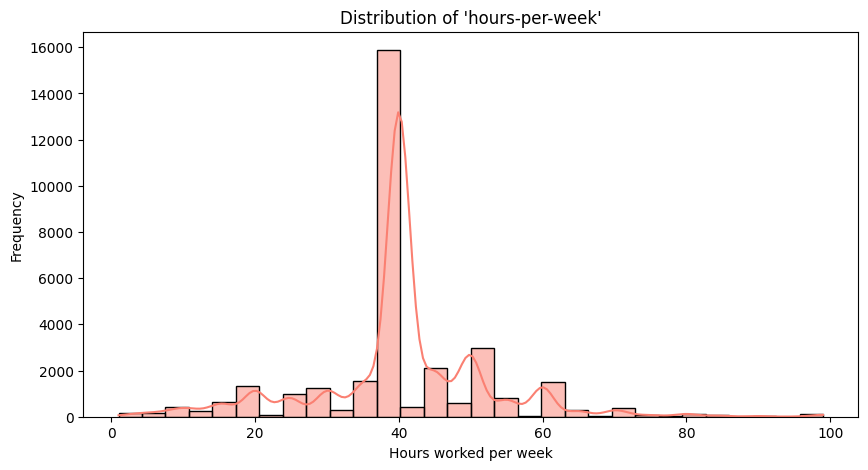

Skewness of 'hours-per-week': 0.227632049774777


In [7]:
# 1.  Analyze hours-per-week Target Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['hours-per-week'], bins=30, kde=True, color='salmon')
plt.xlabel("Hours worked per week")
plt.ylabel("Frequency")
plt.title("Distribution of 'hours-per-week'")
plt.show()

hours_per_week_skewness = skew(data['hours-per-week'])
print(f"Skewness of 'hours-per-week': {hours_per_week_skewness}")

#The distribution of the number of hours per week is positively asymmetrical, with a longer tail on the right side, due to the presence of extreme values
# for the extreme values, people working well above the average of 40 hours per week are recorded, especially the extreme value of 99 hours 

In [ ]:
# 2. Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Dataset summary
On average, the people in this data set:
- they are 38.58 years old
- they have completed 10.08 years of schooling (so we are not talking about a highly educated population, considering that the maximum value is 12 years),
- they earn 1077 usd
- they work on average 40 hours per week; if we were to consider the Romanian legislation, at this number of working hours per week, people work full time. 

In [8]:
# 3. Check for missing values and report the number and percentage of missing data for each column.
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Number of missing values': missing_values, 'Percentage (%)': missing_percentage})
print("Missing values in the dataset:", missing_data)

Missing values in the dataset:                 Number of missing values  Percentage (%)
age                                    0        0.000000
workclass                           1836        5.638647
fnlwgt                                 0        0.000000
education                              0        0.000000
education-num                          0        0.000000
marital-status                         0        0.000000
occupation                          1843        5.660146
relationship                           0        0.000000
race                                   0        0.000000
sex                                    0        0.000000
capital-gain                           0        0.000000
capital-loss                           0        0.000000
hours-per-week                         0        0.000000
native-country                       583        1.790486
income                                 0        0.000000


In [9]:
# Handle missing values - replace with mode because they are categorical
for column in ["workclass", "occupation", "native-country"]:
    mode = data[column].mode()[0]  
    data[column].fillna(mode, inplace=True)  

# Verify is there are other missing values after replacement
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


C:\Users\Iulia\AppData\Local\Temp\ipykernel_2876\4256095668.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode, inplace=True)


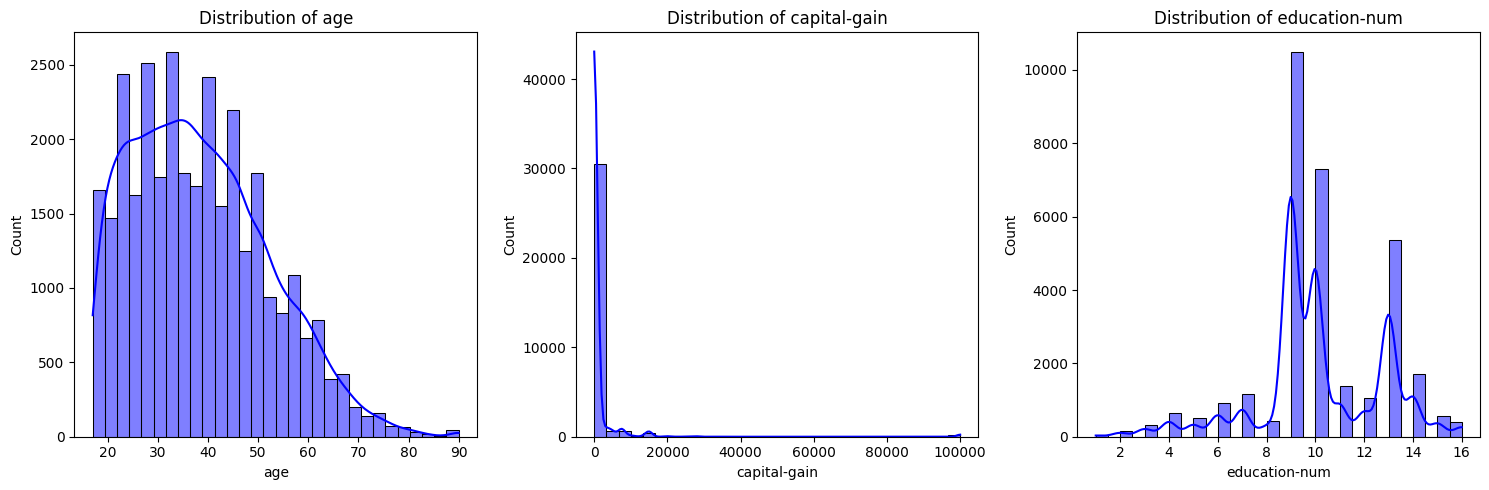

In [10]:
# 4. Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.
numerical_columns = ['age', 'capital-gain', 'education-num']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [11]:
# 4.1 skewness and modality
var1 = 'age'
print(f"Skewness of 'age':{data[var1].skew()}")
print(f"Mode of 'age': {data[var1].mode()[0]}")

var2 = 'capital-gain'
print(f"Skewness of 'capital-gain': {data[var2].skew()}")
print(f"Mode of 'capital-gain': {data[var2].mode()[0]}")

var3 = 'education-num'
print(f"Skewness of 'education-num':{data[var3].skew()}")
print(f"Mode of 'education-num': {data[var3].mode()[0]}")


Skewness of 'age':0.5587433694130484
Mode of 'age': 36
Skewness of 'capital-gain': 11.953847687699799
Mode of 'capital-gain': 0
Skewness of 'education-num':-0.3116758679102297
Mode of 'education-num': 9


## Distribution of age, capital-gain and education-num
- Among the three distributions, the age distribution is the closest to a normal distribution, with skewness values slightly above zero, but it is a positively skewed distribution, with a high concentration of people between 20 and 50 years of age (the modal value being included in this range) and a rightward tail, due to the presence of extreme values, with people aged over 80-85 years and the maximum value of 90 years 
- The distribution for capital gain is also positively skewed, but with a very high concentration in the low income area (especially since the modal value is 0, so most people do not earn an income) and a long tail to the right extended mainly due to the extreme value of 99 999 monetary units, but not only. 
- The distribution for years of education is negatively skewed, with a tail to the left, there are people with no education or very little education, most likely people from less developed countries. The distribution shows two peaks, the first peak between 9-11 years, being people who have reached high school but have not completed it (the modal value is included in this range) and the second peak between 12-14 years are people who have probably completed high school. 

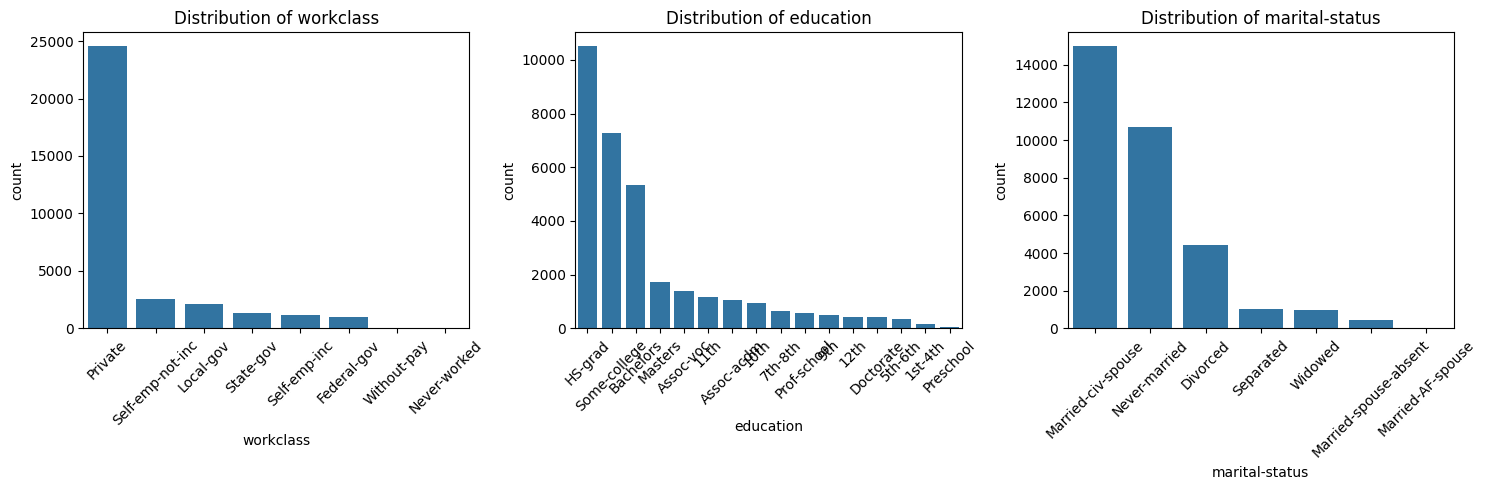

In [12]:
# 5. Generate bar plots for at least three categorical columns and discuss the frequency distributions.
categorical_columns = ['workclass', 'education', 'marital-status']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Distributions of workclass, education and marital status
- Workclass:
    - The majority of people work in the private sector (almost 25,000), with relatively few self-employed (entrepreneurial) or working in the government sector (local-gov, state-gov, federal-gov). The categories of unpaid (without-pay) or never-worked are very rare, suggesting that the majority of respondents are employed.

- Education:
    - The largest category is high-school graduates, followed by some-college. "Bachelors" and "Masters" are less common, indicating that fewer people have completed college or graduate school. "Preschools" and "Doctorates" are extremely rare, which is to be expected since few people reach this educational level. So, most people in this dataset have high school or some college, but only a small percentage reach advanced degrees.

- Marital-status: 
    - "Married-civ-spouse" is the dominant category, meaning most people are married. 'Never-married' is the second most common category, suggesting a high proportion of single people. Divorced people rank third,in significant numbers, but lower than the first two categories. The other categories (separated, widowed, married-AF-spouse, married-spouse-absent) have a relatively low frequency. So, most people are married, followed by those who have never been married. Divorce is significant, but less frequent than marriage. 

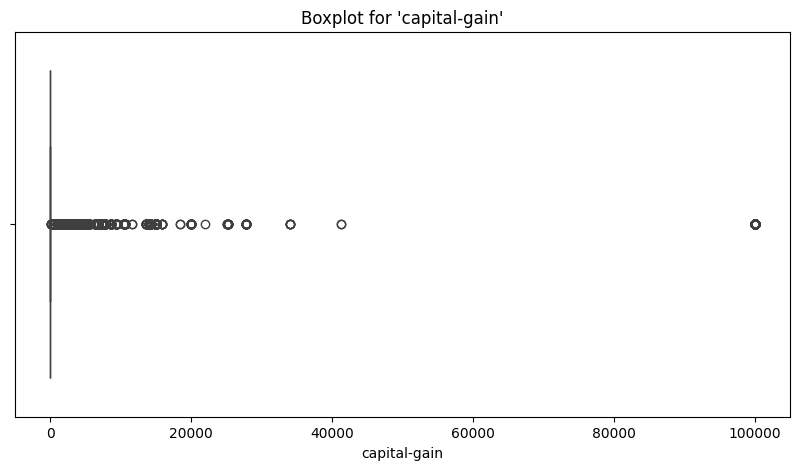

In [13]:
# 6. Identify outliers in at least one numerical column using boxplots.
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['capital-gain'])
plt.title("Boxplot for 'capital-gain'")
plt.show()


# The boxplot suggests that most people earn very low incomes, and the most visible outliers are those earning 100000 usd, 40000+ usd or between 10000 and 40 000.

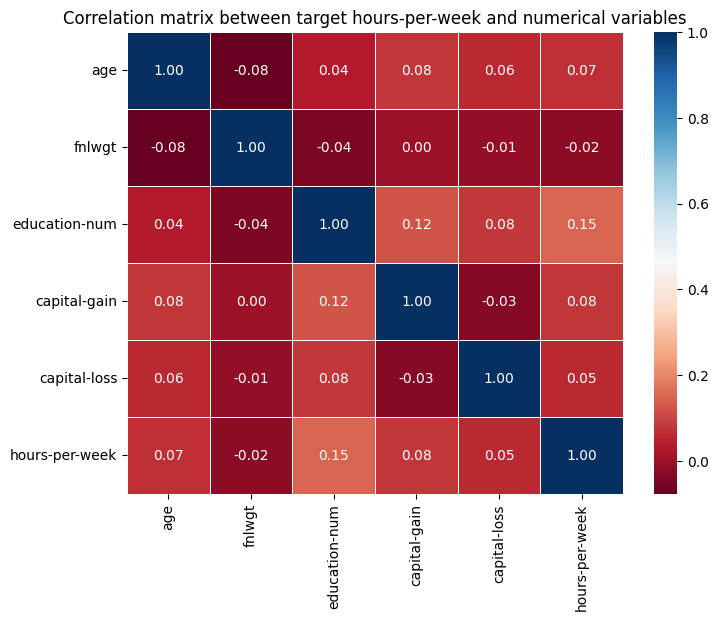

In [14]:
# 7.  Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.
numeric_variables = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

correlation_matrix = data[numeric_variables].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix between target hours-per-week and numerical variables")
plt.show()


## Correlation 
- The strongest correlation with target (hours-per-week) is education-num. However, this correlation is very weak and positive, which means that as the number of hours spent per week increases, the number of years of education increases slightly. However, given that the correlation value is rather small (0.15), this effect is rather negligible and does not suggest a strong relationship. It is possible that this correlation is influenced by other factors and is not a significant direct relationship. 
- The weakest correlation with target (hours-per-week) is fnlwgt. A correlation of -0.02 indicates a very weak and negative relationship between two variables. In this case, the value is so close to 0 that there is virtually no significant relationship between the two variables.

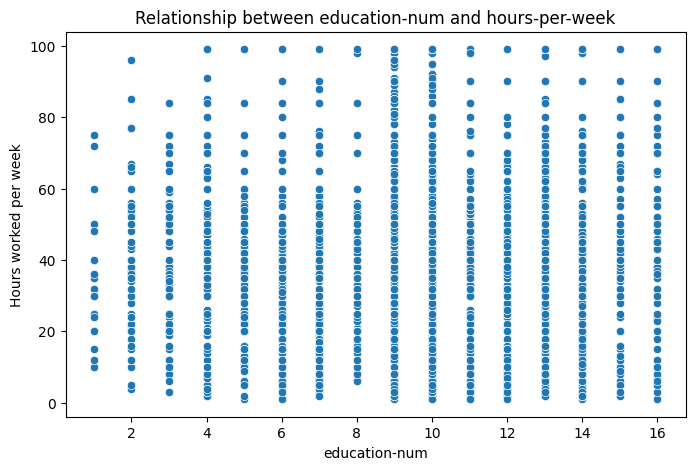

In [15]:
# 8.  Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.
correlation_matrix = data[numeric_variables].corr()
correlation_with_hours = correlation_matrix["hours-per-week"].drop('hours-per-week')
highest_corr_feature = correlation_with_hours.idxmax()
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data[highest_corr_feature], y=data['hours-per-week'])
plt.xlabel(highest_corr_feature)
plt.ylabel("Hours worked per week")
plt.title(f'Relationship between {highest_corr_feature} and hours-per-week')
plt.show()

## Relationship between education-num and hours per week
- The majority of the points are between 30-50 hours worked per week, which means that most people work a standard, full-time job. However, there are outliers, with both people working more and less than the majority. There are also people with few years of education, who work more than 80 hours, but also people with many years of education who work little (in this category can be included people who work part-time or retired). An important factor in justifying this relationship is the occupation/industry in which people work. For example, there may be people with low levels of education who work longer hours because of the physical work they have to do.

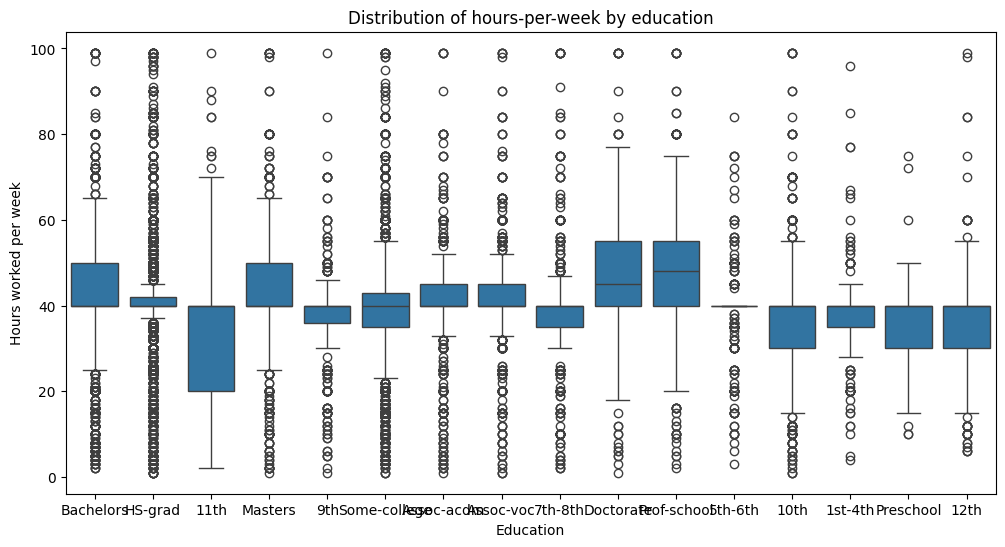

In [16]:
# 9. Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.
# a.education
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['education'], y=data['hours-per-week'])
plt.xlabel("Education")
plt.ylabel("Hours worked per week")
plt.title("Distribution of hours-per-week by education")
plt.show()

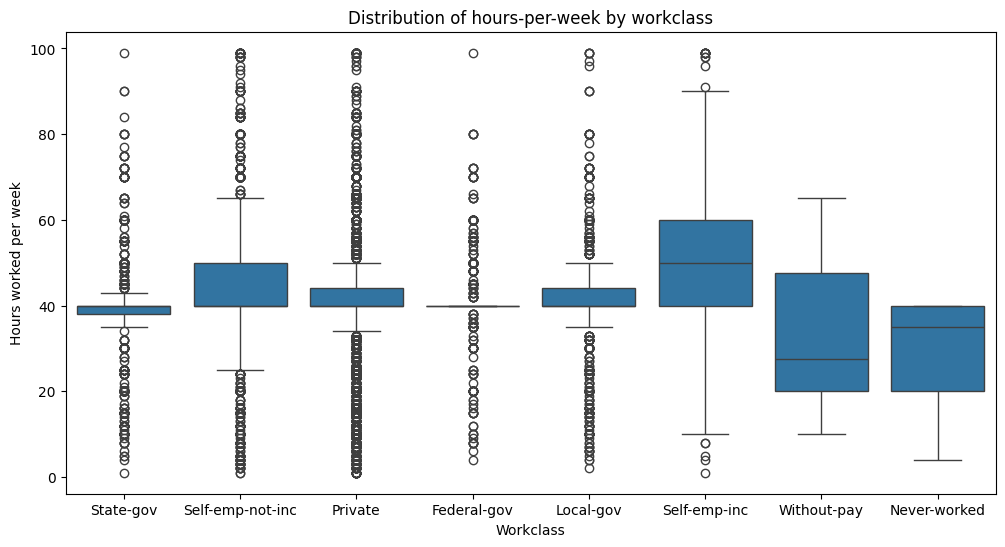

In [17]:
# 9.
# b.workclass
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['workclass'], y=data['hours-per-week'])
plt.xlabel("Workclass")
plt.ylabel("Hours worked per week")
plt.title("Distribution of hours-per-week by workclass")
plt.show()

#Most people work around 40 hours/week, but entrepreneurs and certain categories of employees may work much more.
#There is significant variation between workclass categories, but private and public sector workers have a fairly stabilized schedule.
#Outlierii indicates people working more than 80-100 hours/week, which may signal overwork in certain industries.


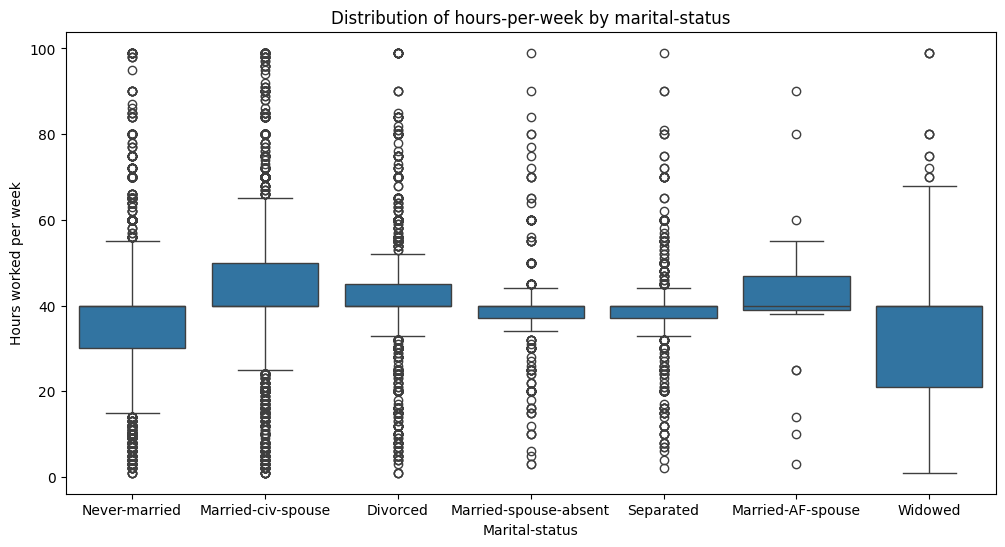

In [18]:
# 9
# b. 'marital-status'
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['marital-status'], y=data['hours-per-week'])
plt.xlabel("Marital-status")
plt.ylabel("Hours worked per week")
plt.title("Distribution of hours-per-week by marital-status")
plt.show()

#Marital status influences the distribution of hours worked per week. Married people tend to work more hours than single or widowed people. 
#"Never-married" and "Divorced" have similar medians, close to 40 hours/week.
#"Married-civ-spouse" appears to have a slight trend toward more hours worked than other groups.
#Married-AF-spouse shows a higher median than other groups.
#"Widowed" has a wider distribution with a slightly lower median.
#Widowed" also has a significant presence of outliers, suggesting that some people work extremely hard regardless of marital status.

## 10. Summarry report
- The distribution of 'hours-per-week' shows that most people work between 35-45 hours/week, but there are outliers working significantly more. An important factor here is occupation or industry. 
- Descriptive statistics indicate that the median for 'hours-per-week' is close to 40. The average age of the people included in the study is 38.5 years, so this is a young workforce. The average number of years of schooling is 10.08 years, which means that the sample population is not highly educated, with very little university or college education. 
- Therefore the relationship between education and the number of hours of work per week indicates a positive but weak correlation, in order to confirm this analysis it is necessary to consider other factors. The correlation analysis indicates that the strongest correlation with 'hours-per-week' is education num and the weakest is fnlwgt.
- Marital status plays an important role in respondents' weekly working hours, and the results show that married people tend to work more hours per week, although I started from the assumption that single people would work more. 
